In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal
import random


# Exercise 1

## Getting info from the text file

In [2]:
years_list = []
decimal_percentage_returns = []

stock_df = pd.read_csv('yearly_sp_data.txt', delimiter='\t')

stock_df

years_list = stock_df['Year'].tolist()

decimal_percentage_returns = stock_df['S&P 500 (includes dividends)'].tolist()

for i in range(len(decimal_percentage_returns)):
    decimal_percentage_returns[i] = decimal_percentage_returns[i][:-1]
    decimal_percentage_returns[i] = float(decimal_percentage_returns[i]) / 100
    


## Stats of the decimals

In [3]:
returns_stats = dal.main_stats(decimal_percentage_returns)

returns_mew =  returns_stats['mean']
returns_std_dev = returns_stats['std_dev']

## Guassian probability function 

In [4]:
def gaussian_prob(x, mean, std_dev):
    '''x : value to evaluate the probability at
       mean : mean of the distribution
       std_dev : standard deviation of the distribution
    '''
    
    coeff = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = np.exp(-0.5 * ((x - returns_mew) / returns_std_dev) ** 2)
    
    gaussian_probability = coeff * exponent
    
    return gaussian_probability

returns_gaussian_probs = []

for x in decimal_percentage_returns:
    returns_gaussian_probs.append(gaussian_prob(x, returns_mew, returns_std_dev))
    
    


# Exercise 2

## Plotting Decimal Percentage vs Year

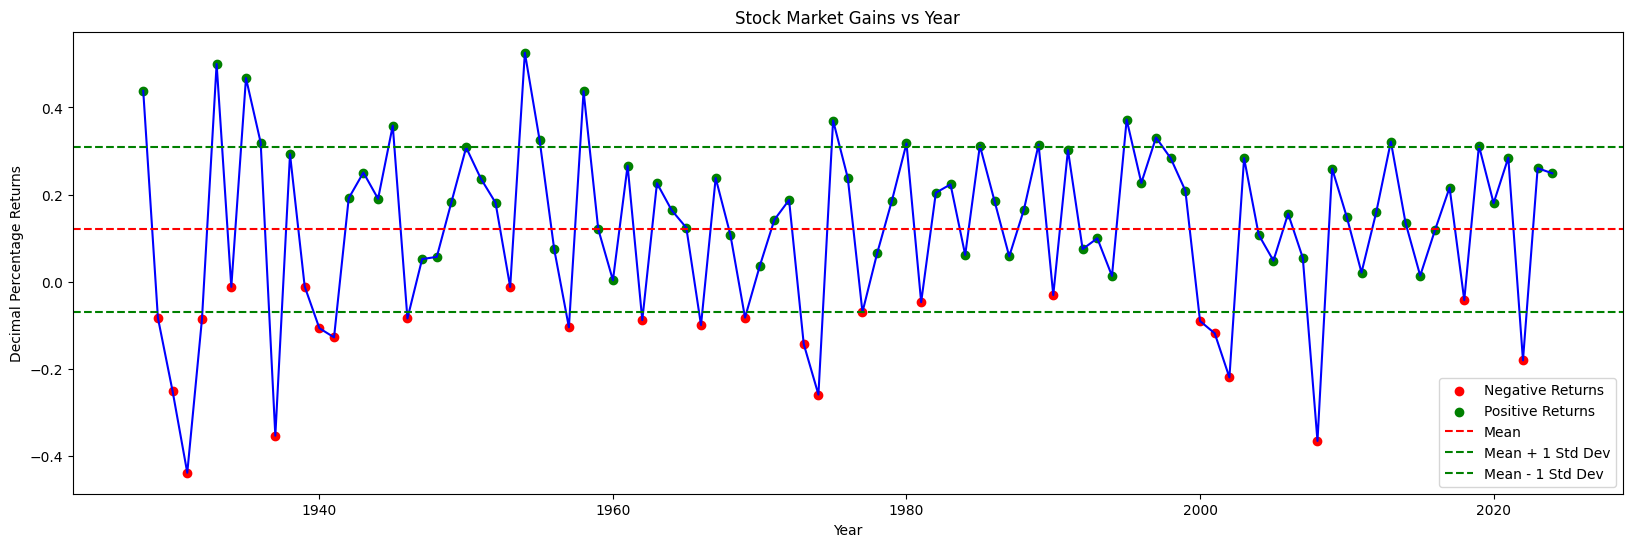

In [5]:
def decimal_percentage_vs_year_plot(years, decimal_returns, mew, std_dev):
    neg_returns = []
    pos_returns = []
    neg_returns_years = []
    pos_returns_years = []
    
    for i in decimal_returns:
        if i < 0:
            neg_returns.append(i)
            
        else:
            pos_returns.append(i)
            
    for x in years:
        if decimal_returns[years.index(x)] < 0:
            neg_returns_years.append(x)
        else:
            pos_returns_years.append(x)
      
    plt.figure(figsize=(20, 6))
    plt.scatter(neg_returns_years, neg_returns, color='red', label='Negative Returns')
    plt.scatter(pos_returns_years, pos_returns, color='green', label='Positive Returns')
    plt.plot(years, decimal_returns, linestyle='-', color='b')
    
    
    # Horizontal lines for mean and std deviation
    plt.axhline(mew, color='r', linestyle='--', label='Mean')
    plt.axhline(mew + std_dev, color='g', linestyle='--', label='Mean + 1 Std Dev')
    plt.axhline(mew - std_dev, color='g', linestyle='--', label='Mean - 1 Std Dev')
    
    plt.title('Stock Market Gains vs Year')
    plt.xlabel('Year')
    plt.ylabel('Decimal Percentage Returns')
    plt.legend()
    
    plt.show()

decimal_percentage_vs_year_plot(years_list, decimal_percentage_returns, returns_mew, returns_std_dev)

## Subplot - Histogram and Normal Distribution Graph

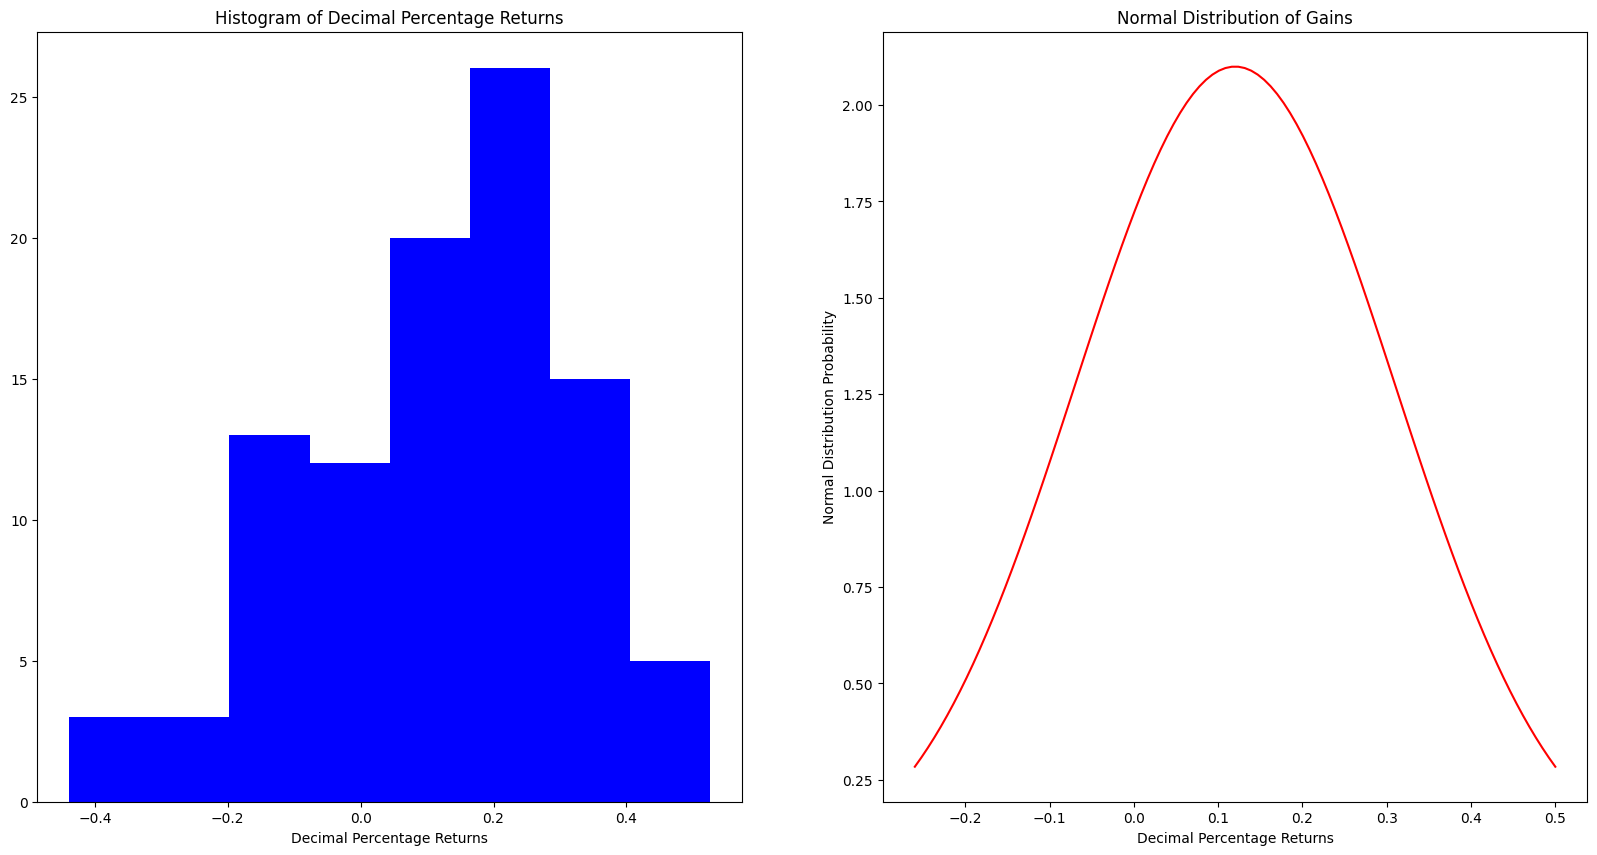

In [6]:
def subplot_histogram_normal_dist(stock_market_gains, mean, std_dev):
    plt.figure(figsize=(20, 10))
    
    # Histogram
    plt.subplot(1, 2, 1)
    
    plt.hist(stock_market_gains, bins=8, color='blue')
    plt.title('Histogram of Decimal Percentage Returns')
    plt.xlabel('Decimal Percentage Returns')
    
    # Normal Distribution Plot
    x_values = [mean + (2 * std_dev), mean - (2 * std_dev)]
    x_fit = np.linspace(x_values[0], x_values[1], 100)
    
    y_fit = gaussian_prob(x_fit, mean, std_dev)
    
    
    plt.subplot(1, 2, 2)
    plt.plot(x_fit, y_fit, color='red')
    plt.title('Normal Distribution of Gains')
    plt.xlabel('Decimal Percentage Returns')
    plt.ylabel('Normal Distribution Probability')

    
subplot_histogram_normal_dist(decimal_percentage_returns, returns_mew, returns_std_dev)
    

# Putting Everything Together

## GOAL : Write a python program that will estimate how long it will take in years for the S&P 500 to double.

In [7]:
def monte_carlo_simulation(target_multiplier, mean_return, std_dev_return, simulation_number):
    '''target_multiplier : The target multiplier to reach (e.g., 2 for doubling)
       mean_return : Mean of the returns
       std_dev_return : Standard deviation of the returns
       simulation_number : Number of simulations to run
    '''
    number_of_years_list = []
    
    for i in range(simulation_number):
        current_val = 1
        number_of_years = 0
        
        
        while current_val < target_multiplier:
            random_gaussian_return = random.gauss(mean_return, std_dev_return)
            current_val = current_val * (1 + random_gaussian_return)
            number_of_years += 1
        
        number_of_years_list.append(number_of_years)
        
        mean = np.mean(number_of_years_list)
        std_dev = np.std(number_of_years_list)
        
    return number_of_years_list, mean, std_dev

stock_simulation_results, simulation_mean, simulation_std = monte_carlo_simulation(2, returns_mew, returns_std_dev, 100)

print(simulation_mean)


7.75


# Project – Client Portfolio Analysis

In [8]:
def monte_carlo_simulation_added_value(target_multiplier, mean_return, std_dev_return, simulation_number, initial_investment = 1, added_value = 0):
    '''target_multiplier : The target multiplier to reach (e.g., 2 for doubling)
       mean_return : Mean of the returns
       std_dev_return : Standard deviation of the returns
       simulation_number : Number of simulations to run
    '''
    number_of_years_list = []
    
    for i in range(simulation_number):
        current_val = initial_investment
        number_of_years = 0
        
        while current_val < target_multiplier * initial_investment:
            random_gaussian_return = random.gauss(mean_return, std_dev_return)
            current_val = (current_val + added_value) * (1 + random_gaussian_return) 
            number_of_years += 1
            
        number_of_years_list.append(number_of_years)
        
        mean = np.mean(number_of_years_list)
        std_dev = np.std(number_of_years_list)
        
    return number_of_years_list, mean, std_dev

client_results, client_mean, client_std = monte_carlo_simulation_added_value(20, returns_mew, returns_std_dev, 100, initial_investment = 50000, added_value = 5000)

print(client_std)
print(client_mean)

7.129452994444946
23.97
